# The Effect of Conflict duration on Solar Energy Adoption:
 ## **_Analysis of Trade Data_**



### Objective of the Analysis

**The objective of this analysis is to explore the impact of prolonged conflict duration on solar adoption across countries, while also considering their economic status. By grouping countries into categories based on the length of conflict (Continuous, Periodical, or No Conflict) and analyzing their GDP classification, we aim to identify patterns or disparities in the level of solar energy adoption. This can help reveal whether persistent instability hinders renewable energy efforts.**

### 🔑 Key Questions


1. How is solar energy adoption expected to vary between countries with continuous conflict, periodical conflict, and no conflict?

2. What role does economic strength (GDP) play in enabling or limiting solar imports during times of conflict?

3. Are there identifiable trends in solar import volumes over time that distinguish periodical conflict countries from those with ongoing conflicts?

4. Which solar products (e.g., PV modules vs. other types) are likely to dominate imports in conflict-affected areas compared to stable countries?

5. How might the interaction between conflict duration, economic capacity, and political conditions influence the success of solar energy adoption initiatives?


In [39]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Load the dataset
# read dataframe from GitHup
url = "https://github.com/MIT-Emerging-Talent/ET6-CDSP-group-08-repo/raw/refs/heads/main/1_datasets/cleaned_data/UN_comtrade_clean_dataset.xlsx"
df = pd.read_excel(url, engine="openpyxl")
df.head()

,Year,Country_Code,Country,Product_Code,Product_Description,Net_Weight_kg,Value_USD,Conflict_Year
0,2019,AFG,Afghanistan,854140,"Electrical apparatus; photosensitive, includin...",7.700172e+07,89932863.97,True
1,2007,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",1.796000e+03,26489.00,False
2,2008,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",1.654000e+03,61941.00,False
3,2009,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",7.822000e+03,269897.00,False
4,2010,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",1.234600e+04,173026.00,False


## Conflict Duration Grouping

Countries are categorized based on real-world conflict patterns into three groups:

- Continuous Conflict: Countries experiencing prolonged and ongoing conflict (e.g., Afghanistan, Libya, Mali, Sudan, Yemen).
- Periodical Conflict: Countries facing intermittent conflict across years (e.g., Iraq, Ukraine, Nigeria).
- No Conflict: Countries with political stability and no major recent conflicts (e.g., Germany, Morocco, Saudi Arabia).

This classification supports the analysis of how the duration of conflict may influence solar adoption trends.


In [41]:
# Define conflict groups
continuous_conflict = [
    "Afghanistan",
    "Syria",
    "Yemen",
    "Sudan",
    "Sudan (...2011)",
    "State of Palestine",
    "Libya",
    "Mali",
]
periodical_conflict = [
    "Iraq",
    "Nigeria",
    "Central African Rep.",
    "Ethiopia",
    "Ukraine",
    "Myanmar",
    "Pakistan",
    "Mozambique",
]
no_conflict = ["Germany", "Morocco", "Rwanda", "Saudi Arabia"]


# Function to assign conflict group
def classify_conflict(country):
    if country in continuous_conflict:
        return "Continuous Conflict"
    elif country in periodical_conflict:
        return "Periodical Conflict"
    elif country in no_conflict:
        return "No Conflict"
    else:
        return "Unknown"


# Apply classification
df["Conflict_Group"] = df["Country"].apply(classify_conflict)

# Save or display the updated DataFrame
df.to_excel("solar_imports_with_conflict_group.xlsx", index=False)
df.head()

,Year,Country_Code,Country,Product_Code,Product_Description,Net_Weight_kg,Value_USD,Conflict_Year,Conflict_Group
0,2019,AFG,Afghanistan,854140,"Electrical apparatus; photosensitive, includin...",7.700172e+07,89932863.97,True,Continuous Conflict
1,2007,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",1.796000e+03,26489.00,False,Periodical Conflict
2,2008,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",1.654000e+03,61941.00,False,Periodical Conflict
3,2009,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",7.822000e+03,269897.00,False,Periodical Conflict
4,2010,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",1.234600e+04,173026.00,False,Periodical Conflict


 ## GDP Data Integration

In [42]:
# Define GDP groups based on the provided information

# GDP groups dictionary
gdp_groups = {
    "High GDP": ["Germany", "Saudi Arabia"],
    "Medium GDP": ["Iraq", "Libya", "Morocco", "Nigeria", "Pakistan", "Ukraine"],
    "Low GDP": [
        "Afghanistan",
        "Central African Rep.",
        "Ethiopia",
        "Mali",
        "Mozambique",
        "Myanmar",
        "Rwanda",
        "State of Palestine",
        "Sudan",
        "Sudan (...2011)",
        "Syria",
        "Yemen",
    ],
}


# Create mapping from country to GDP status
def map_gdp_status(country):
    for gdp_status, countries in gdp_groups.items():
        if country in countries:
            return gdp_status
    return "Unknown"


# Apply the mapping to create a new column in the DataFrame
df["GDP_Status"] = df["Country"].apply(map_gdp_status)

df.head(3)

,Year,Country_Code,Country,Product_Code,Product_Description,Net_Weight_kg,Value_USD,Conflict_Year,Conflict_Group,GDP_Status
0,2019,AFG,Afghanistan,854140,"Electrical apparatus; photosensitive, includin...",7.700172e+07,89932863.97,True,Continuous Conflict,Low GDP
1,2007,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",1.796000e+03,26489.00,False,Periodical Conflict,Low GDP
2,2008,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",1.654000e+03,61941.00,False,Periodical Conflict,Low GDP


## Product Categorization 

In [43]:
def categorize_product(description):
    description = str(description).lower()
    if "photovoltaic" in description:
        return "PV Modules"
    elif "static converter" in description:
        return "Inverters"
    elif "lead-acid" in description:
        return "Lead-Acid Batteries"
    elif "lithium-ion" in description:
        return "Lithium Batteries"
    elif "portable" in description and "electric" in description:
        return "Solar Lamps"
    elif "electric generator" in description:
        return "Solar Generators"
    else:
        return "Other"


df["Product_Category"] = df["Product_Description"].apply(categorize_product)

 ### **Analysis 1: Trend Comparison by conflict country
 **Line chart showing total import value trends for each conflict group over time.**

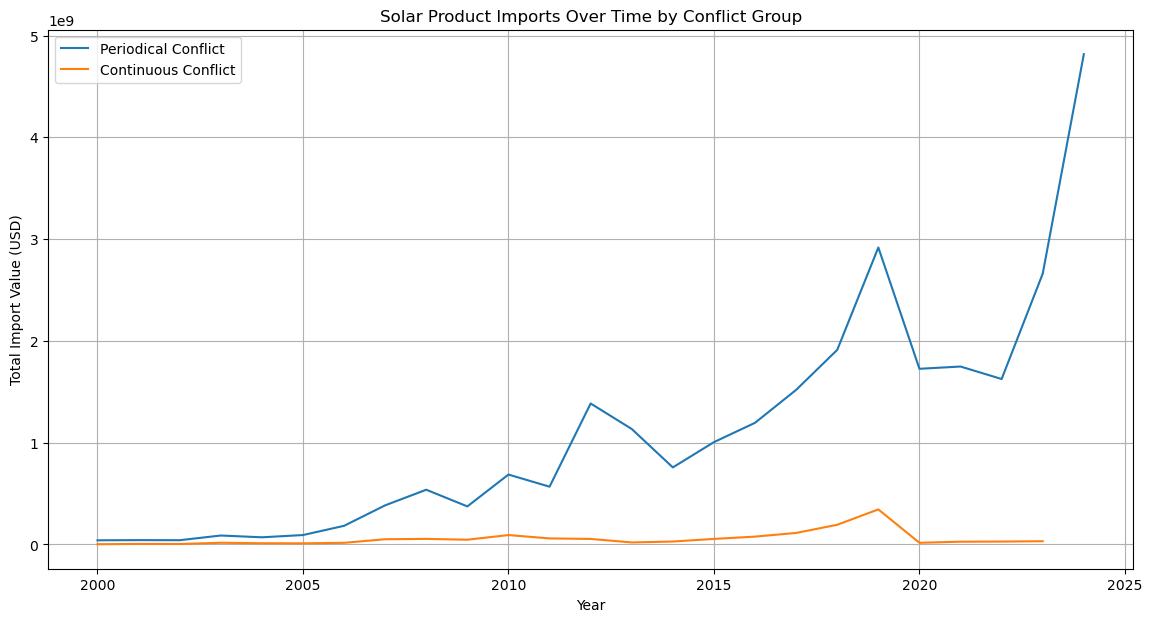

In [44]:
#  Time Trends by Conflict Group (Periodical VS Continuous) ---
plt.figure(figsize=(14, 7))
for group in ["Periodical Conflict", "Continuous Conflict"]:
    group_data = df[df["Conflict_Group"] == group]
    trend = group_data.groupby("Year")["Value_USD"].sum()
    plt.plot(trend.index, trend, label=group)

plt.title("Solar Product Imports Over Time by Conflict Group")
plt.ylabel("Total Import Value (USD)")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.show()

### Analysis 2: GDP vs Solar Adoption

- Relationship between economic development and solar adoption

- Differences in this relationship between conflict groups

C:\Users\زينب\AppData\Local\Temp\ipykernel_26016\739922633.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


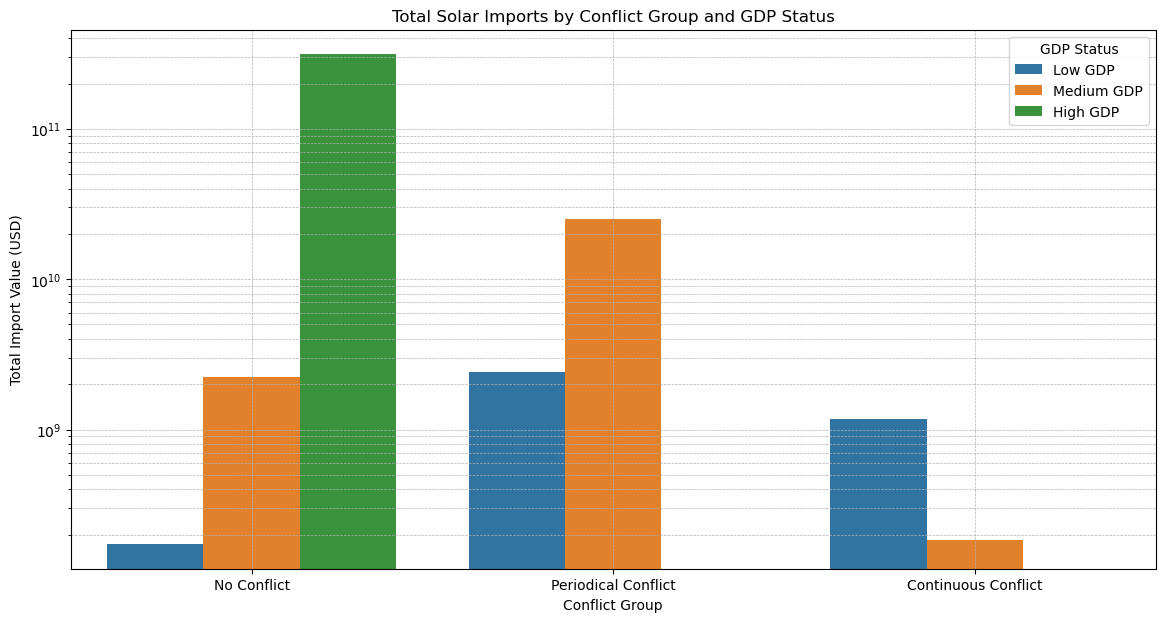

In [45]:
# Solar Adoption by Conflict Group and GDP Status ---
plt.figure(figsize=(14, 7))
sns.barplot(
    data=df,
    x="Conflict_Group",
    y="Value_USD",
    hue="GDP_Status",
    estimator=sum,
    ci=None,
    order=["No Conflict", "Periodical Conflict", "Continuous Conflict"],
)
plt.title("Total Solar Imports by Conflict Group and GDP Status")
plt.ylabel("Total Import Value (USD)")
plt.xlabel("Conflict Group")
plt.yscale("log")  # Use log scale for better visualization of large differences
plt.legend(title="GDP Status")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

## Analysis 3: Product Mix by Conflict Group

- Differences in product preferences between conflict and non-conflict settings

- Identification of which products are most important in conflict zones

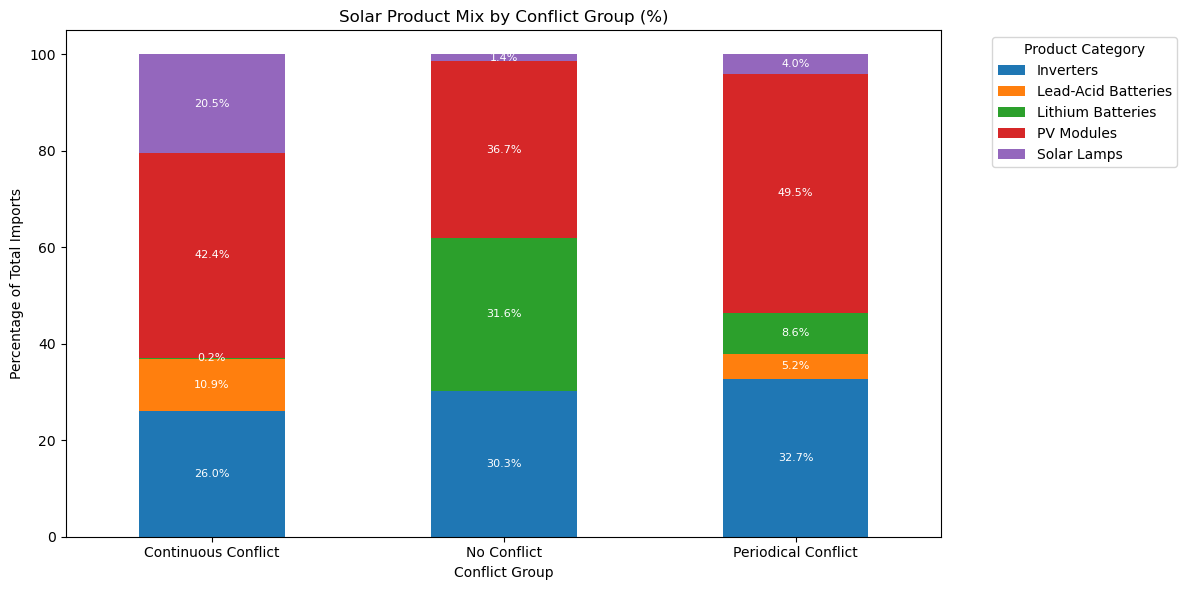

In [46]:
# Product Mix Across Conflict Groups ---
product_mix = (
    df.groupby(["Conflict_Group", "Product_Category"])["Value_USD"].sum().unstack()
)

# Normalize to show percentages
product_mix_percent = product_mix.div(product_mix.sum(axis=1), axis=0) * 100

ax = product_mix_percent.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Solar Product Mix by Conflict Group (%)")
plt.ylabel("Percentage of Total Imports")
plt.xlabel("Conflict Group")
plt.xticks(rotation=0)
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1))
plt.tight_layout()

# Add percentages to all segments of the stacked bars using ax.text
for container in ax.containers:
    for patch in container.patches:
        width, height = patch.get_width(), patch.get_height()
        x, y = patch.get_xy()
        if height > 0:
            ax.text(
                x + width / 2.0,
                y + height / 2.0,
                f"{height:.1f}%",
                ha="center",
                va="center",
                color="white",  # Set text color for better visibility
                fontsize=8,
            )  # Adjust fontsize as needed

plt.show()

## Analysis 4: Statistical Comparison

-  differences between conflict groups

- Identification of statistically significant patterns

In [47]:
#  Statistical Summary
conflict_stats = df.groupby(["Conflict_Group", "GDP_Status"]).agg(
    {"Value_USD": ["mean", "median", "sum"], "Net_Weight_kg": "mean"}
)

print("\nStatistical Comparison by Conflict Group and GDP Status:")
print(conflict_stats)


Statistical Comparison by Conflict Group and GDP Status:
                                   Value_USD                              \
                                        mean        median           sum   
Conflict_Group      GDP_Status                                             
Continuous Conflict Low GDP     4.304237e+06  1.383758e+06  1.179361e+09   
                    Medium GDP  6.145910e+06  2.989207e+06  1.843773e+08   
No Conflict         High GDP    1.632752e+09  1.285895e+08  3.134884e+11   
                    Low GDP     2.273031e+06  6.573871e+05  1.727504e+08   
                    Medium GDP  2.523981e+07  6.570057e+06  2.246343e+09   
Periodical Conflict Low GDP     6.936723e+06  1.893903e+06  2.400106e+09   
                    Medium GDP  8.398748e+07  2.161070e+07  2.511226e+10   

                               Net_Weight_kg  
                                        mean  
Conflict_Group      GDP_Status                
Continuous Conflict Low GDP     1.848440

**Histogram of Import Values (USD) by Conflict Group**

This code plots histograms of solar import values (in USD) for three groups of countries based on their conflict status: No Conflict, Periodical Conflict, and Continuous Conflict. By using a logarithmic scale on the y-axis, it highlights the frequency distribution of import values across these groups, allowing comparison of how import volumes vary with conflict intensity.

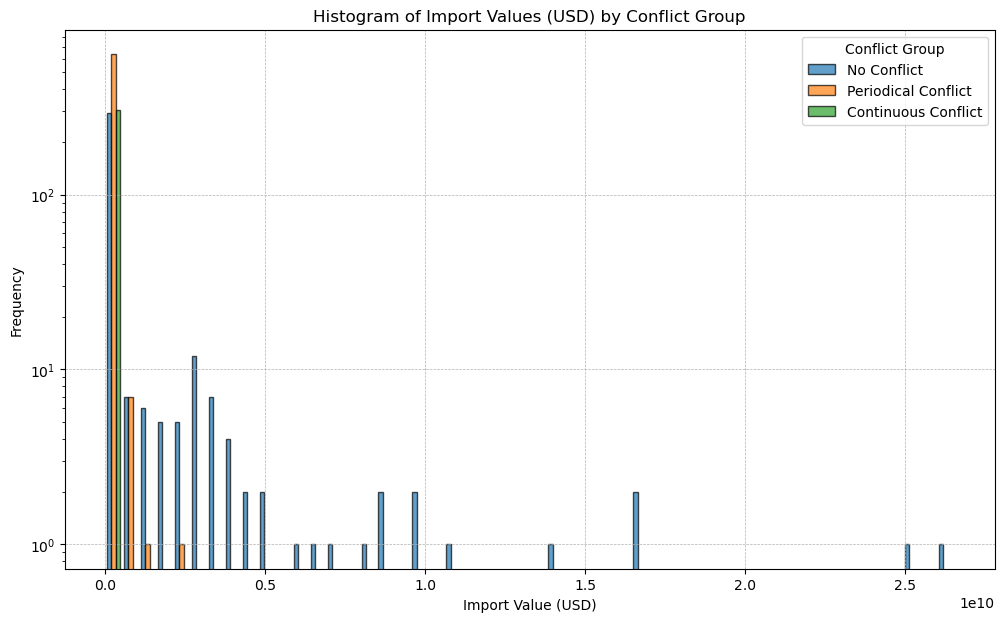

In [48]:
# Prepare data for each group
groups = ["No Conflict", "Periodical Conflict", "Continuous Conflict"]
data = [df[df["Conflict_Group"] == group]["Value_USD"] for group in groups]

plt.figure(figsize=(12, 7))
plt.hist(
    data,
    bins=50,
    stacked=False,
    label=groups,
    edgecolor="black",
    alpha=0.7,
)
plt.title("Histogram of Import Values (USD) by Conflict Group")
plt.xlabel("Import Value (USD)")
plt.ylabel("Frequency")
plt.yscale("log")
plt.legend(title="Conflict Group")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

## Analysis 5: Solar Adoption Intensity Relative to Economic Capacity


This code calculates a new metric called **Conflict Intensity**, which measures solar import value relative to each country's GDP per capita. It then visualizes this intensity across three conflict groups—Non-conflict, Periodical Conflict, and Continuous Conflict—using boxplots on a logarithmic scale to compare how solar adoption intensity differs by conflict status while accounting for economic size.


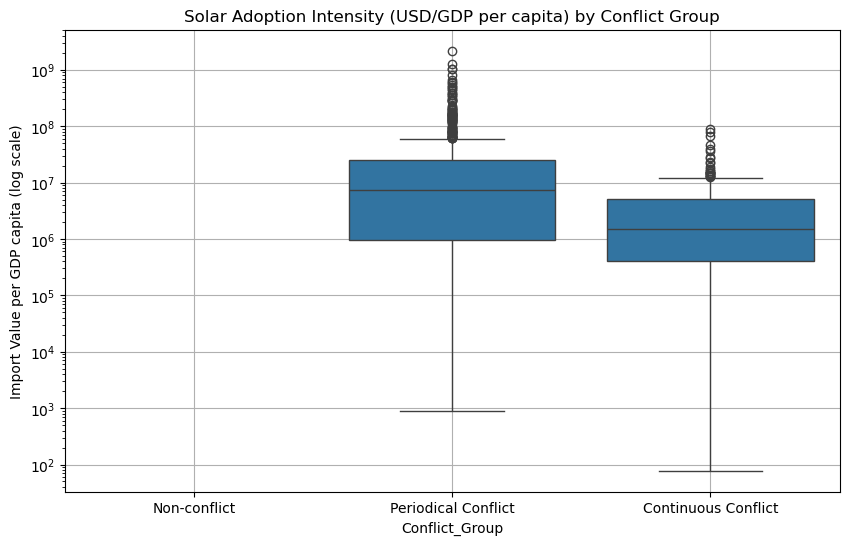

In [49]:
# Ensure 'GDP_per_capita' exists, otherwise set to a default value (e.g., 1 to avoid division by zero)
if "GDP_per_capita" not in df.columns:
    # If you have GDP and population columns, uncomment and use the following:
    # df["GDP_per_capita"] = df["GDP"] / df["Population"]
    # Otherwise, set to a default value to avoid error
    df["GDP_per_capita"] = 1  # Replace with actual calculation if data is available

# Create conflict intensity metric (Value_USD per GDP capita)
df["Conflict_Intensity"] = df.apply(
    lambda x: x["Value_USD"] / x["GDP_per_capita"] if x["GDP_per_capita"] > 0 else 0,
    axis=1,
)

# Plot intensity by conflict group
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="Conflict_Group",
    y="Conflict_Intensity",
    order=["Non-conflict", "Periodical Conflict", "Continuous Conflict"],
)
plt.title("Solar Adoption Intensity (USD/GDP per capita) by Conflict Group")
plt.yscale("log")
plt.ylabel("Import Value per GDP capita (log scale)")
plt.grid(True)

## Analysis 6: Heatmap of Solar Import Shares Across Conflict and Economic Group

This code creates a heatmap visualization showing the distribution of solar import values as percentages of total imports, broken down by conflict group, GDP status, and product category. The heatmap helps identify which solar products are most commonly imported within each economic and conflict context, revealing patterns in solar adoption across different country groups.

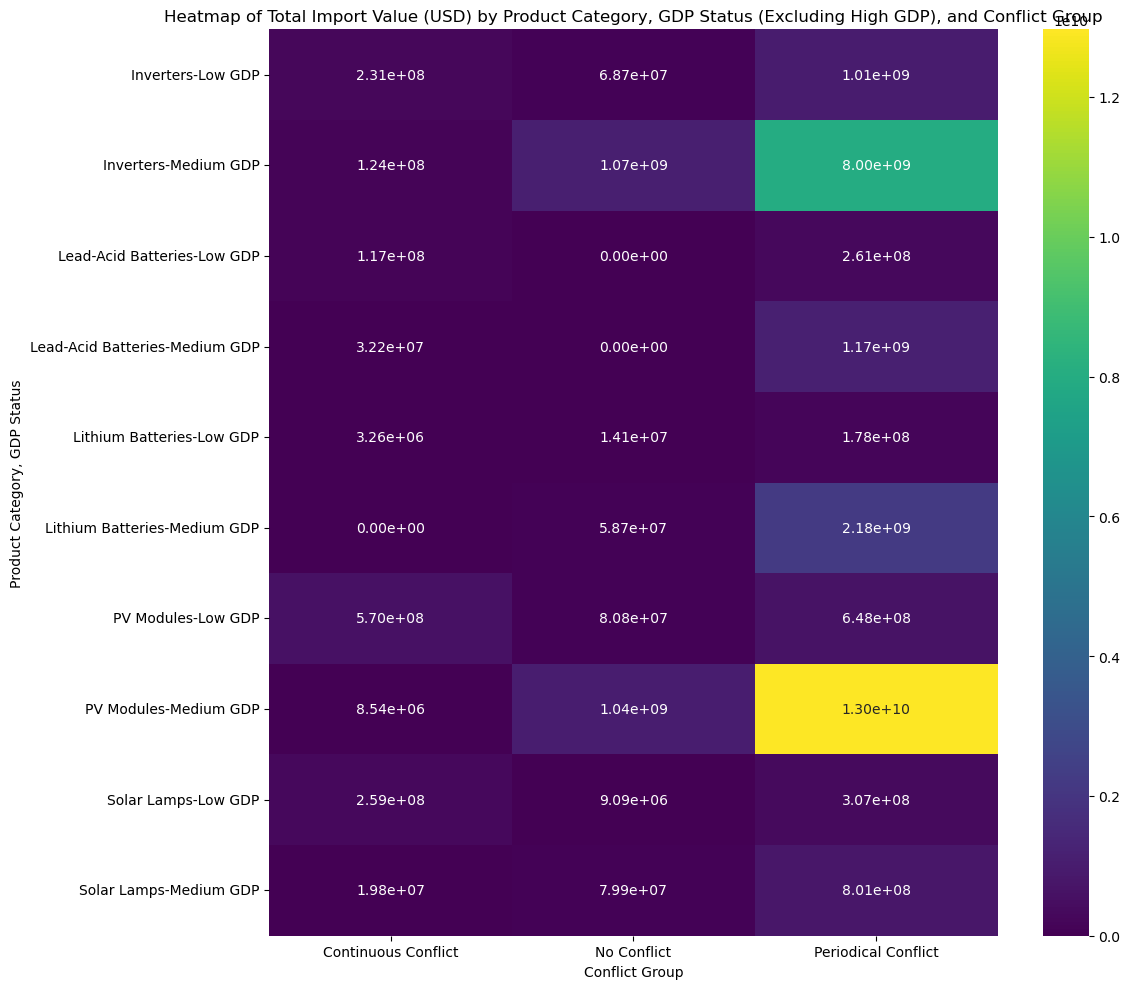

In [52]:
# Create a pivot table including Product Category, Conflict Group, and GDP Status
product_conflict_gdp_value_matrix = df.pivot_table(
    index=["Product_Category", "GDP_Status"],
    columns="Conflict_Group",
    values="Value_USD",
    aggfunc="sum",
    fill_value=0,
)

# Filter the matrix to exclude 'High GDP' from the index
product_conflict_gdp_value_matrix_filtered = product_conflict_gdp_value_matrix.drop(
    "High GDP", level="GDP_Status"
)

plt.figure(figsize=(12, 10))
sns.heatmap(
    product_conflict_gdp_value_matrix_filtered, annot=True, cmap="viridis", fmt=".2e"
)  # Use scientific notation for large numbers
plt.title(
    "Heatmap of Total Import Value (USD) by Product Category, GDP Status (Excluding High GDP), and Conflict Group"
)
plt.xlabel("Conflict Group")
plt.ylabel("Product Category, GDP Status")
plt.tight_layout()
plt.show()


### ✅ Key Findings After the Analysis

#### After the analysis we found:

**1. Solar imports increase in periodical conflict areas:**
  Periodical conflict zones show growing imports of solar products over time, likely due to temporary stability and stronger economic capacity that enable continued investment in renewable energy, as seen in Chart 1.

**2. Solar imports decline in continuous conflict areas:**
  Lower solar imports in continuous conflict regions can be attributed to weak economies, deteriorated infrastructure, and ongoing political and security instability that hinder import and distribution processes, which Chart 1 and Chart 4 help illustrate.

**3. Economic status plays a critical role:**
  Countries with middle and high GDP tend to adopt larger and more sustainable solar solutions, while low-income countries mainly rely on basic, low-cost options like solar lamps. This relationship is reflected in Chart 2.

**4. PV modules dominate solar imports in conflict zones:**
  Photovoltaic (PV) modules are the most imported solar product in conflict-affected areas, reflecting a focus on essential and practical solar solutions suitable for unstable environments, as indicated by Chart 3.

**5. A three-way relationship exists between conflict duration, economic status, and solar adoption:**
  Conflict duration drives the need for independent energy solutions; economic capacity shapes the scale and type of solar products adopted; and stability and supportive policies facilitate sustained and large-scale adoption, which is supported by the data patterns shown in Chart 4.
